In [1]:
from PulsarTimingAnalysis import *
import pandas as pd
import matplotlib.pylab as plt
from IPython.display import Image
import numpy as np

# Creating the PulsarAnalysis object and settings

In [2]:
h=PulsarAnalysis()

Setting the input file. If we use a LST1 DL2-file:

In [3]:
h.setLSTInputFile(dirname='/fefs/aswg/workspace/alvaro.mas/data/real/src_dependent/DL2_pulsar/20201120/',src_dep=True)

We need to set the phase limits of the background and the peaks (signal region). We can define one,two or three signal regions. 

In [4]:
h.setBackgroundLimits([0.52,0.87])
h.setPeaklimits(P1_limits=[0,0.026,0.983,1],P2_limits=[0.377,0.422],P3_limits=None)

We can also set the binning that we are going to use for the construction of the lightcurve:

In [5]:
h.setBinning(50,xmin=0,xmax=1)

Additional cuts in gammaness or arrival direction can be set:

- Gammaness_cut
- Alpha_cut
- Theta2_cut
- Zd_cut

In [6]:
h.setParamCuts(gammaness_cut=0.6,alpha_cut=20)

We can also define the time interval (in seconds) in which we update the statistics. For instance, if we set tint=3600, the statistics will be calculated every hour of accumulated time of observation.

In [7]:
h.setTimeInterval(tint=3600*40)

If we want to do the fitting to the peaks to a model we can define it as following:

Available models:

- Single gaussian ('gaussian')
- Double gausssian ('dgaussian')
- Assymetric doble gaussian ('asym_dgaussian')
- Double lorentzian ('lorentzian')

In [8]:
h.setFittingParams(model='dgaussian',binned=False)

We can also do the statistics in certain energy bins. To set this binning:

In [10]:
h.setEnergybinning([0.0251188,0.03981071705534975,0.06309573444801934,0.1,0.19952623149688806,0.31622776601683805])

# Running

Once the settings are defined we can calculate the statistics/fitting by running:

In [8]:
h.run()

Initializing...
Calculating statistics...
No fit has been done since no fit parameters has been set

Performing energy-dependent analysis...
No Energy Analysis was performed. Check that you set the right energy params
FINISHED


In [11]:
len(h.phases)

3964077

In [9]:
h.save_df('/fefs/aswg/workspace/alvaro.mas/data/real/src_dependent/DL2_pulsar/dl2_LST-1.02965.0000_pulsar_nov20_mar21Run.h5')

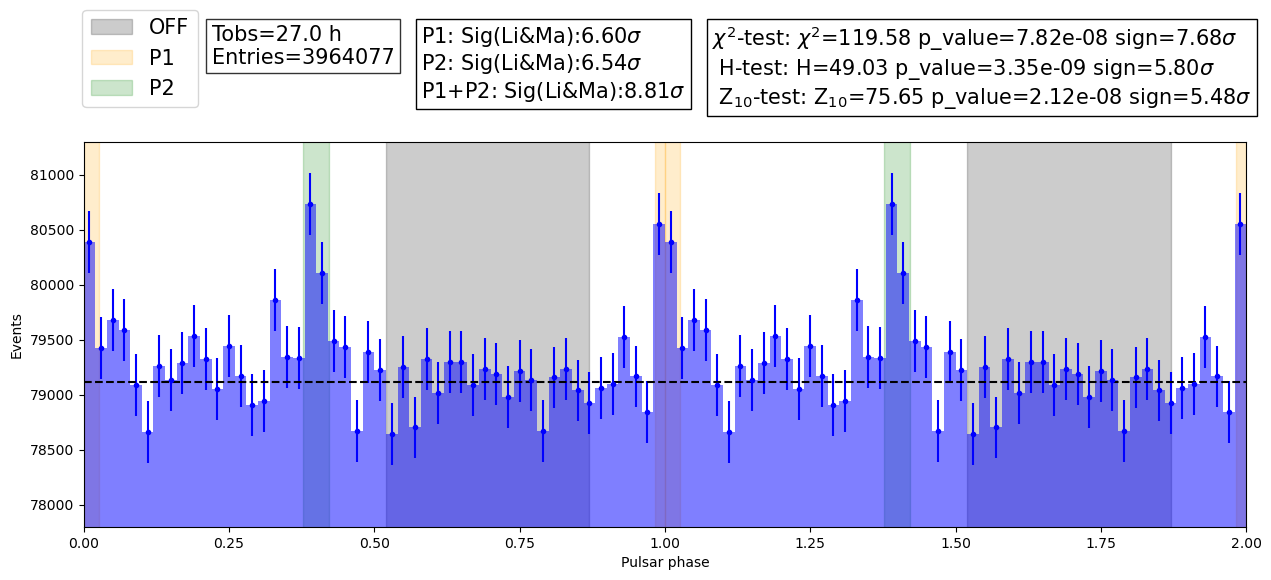

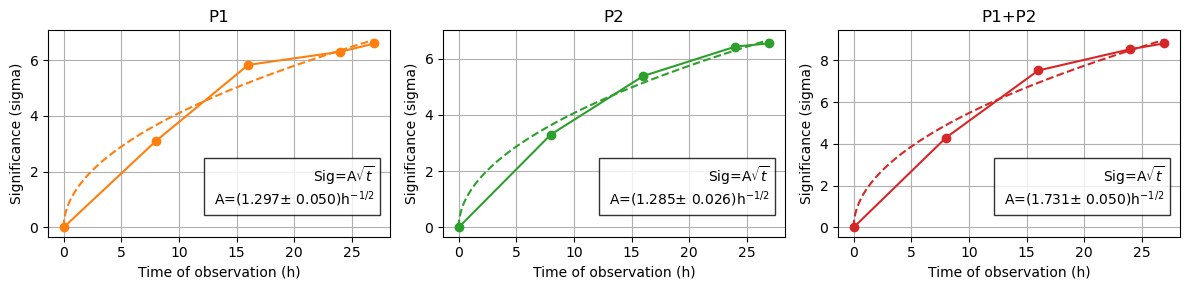

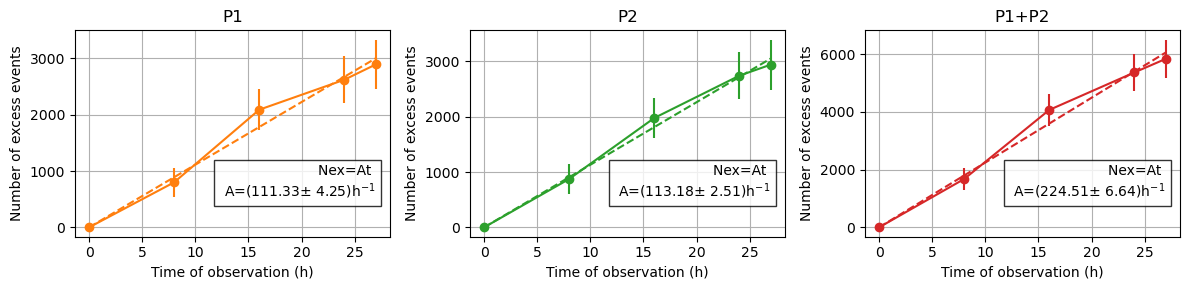

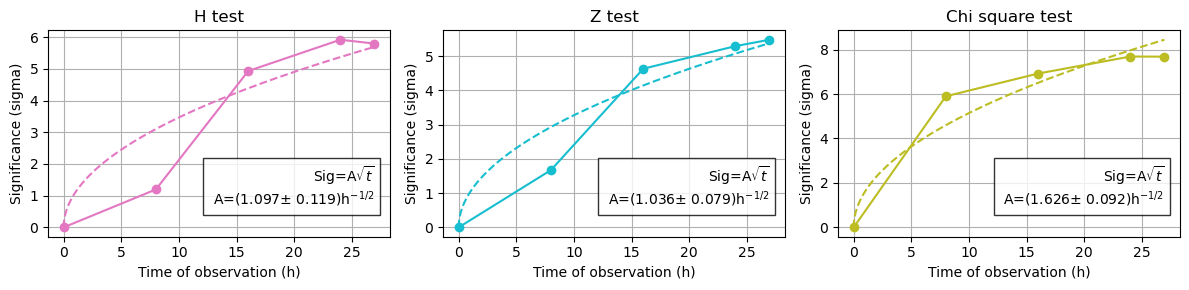

No good fit available


In [9]:
h.save_results('prueba.pdf')

# Show the results

## Overall results

We can show the lightcurve with the general results of the analysis. 

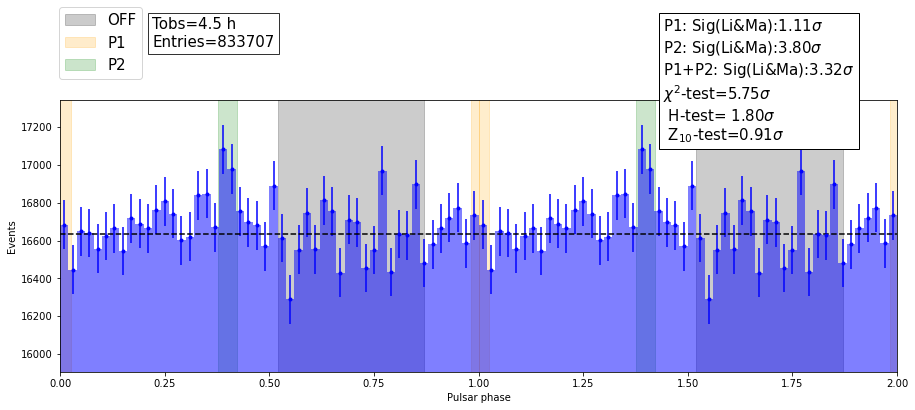

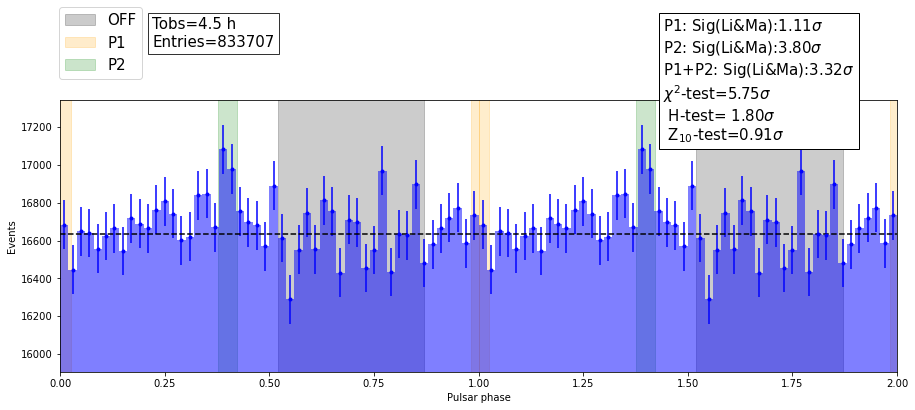

In [9]:
h.draw_phaseogram(phase_limits=[0,2],colorhist='blue')

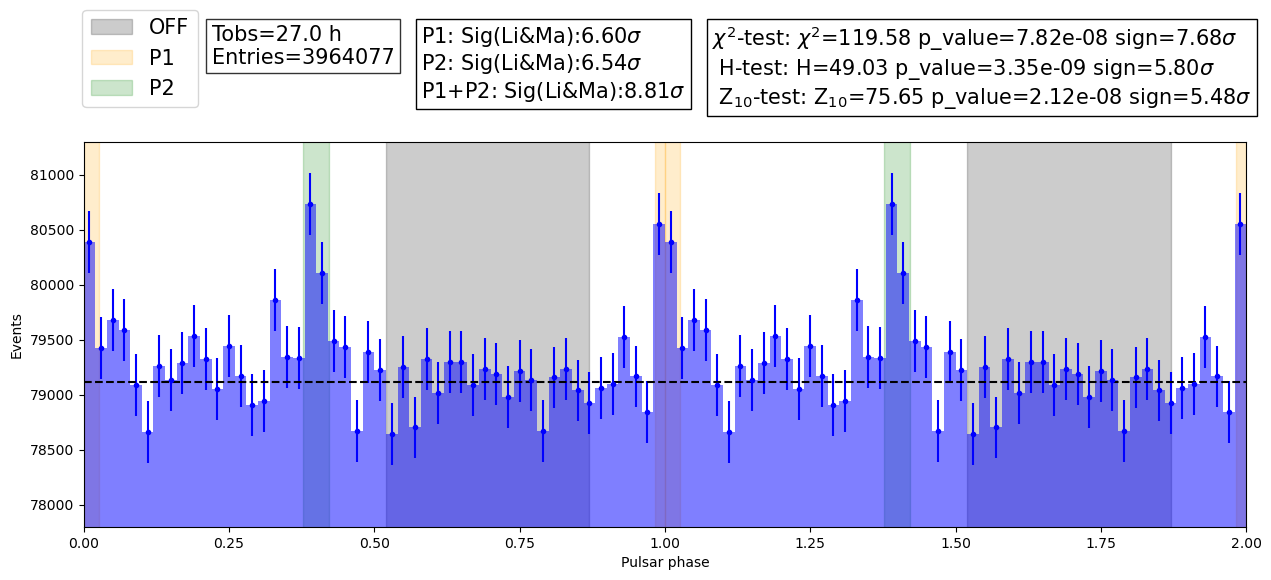

In [12]:
h.draw_phaseogram(phase_limits=[0,2],colorhist='blue',stats='long')

And show the overall results in detail:

In [13]:
peak_stats,period_stats=h.show_Presults()

RESULTS FOR THE PEAK STATISTICS:

                         P1             P2          P1+P2
Significance       6.600766       6.544815       8.812980
Nex             2893.374286    2942.042857    5835.417143
Nex_error        440.268025     451.422824     664.338621
Number        172944.000000  180902.000000  353846.000000
noff          170050.625714  177959.957143  348010.582857
sign_t_ratio       1.271016       1.260243       1.696991
s/n ratio          7.016419       6.974095       9.891808

P1/P2 ratio=0.98+/-0.21


 
RESULTS FOR THE PERIODICITY SEARCH:

                    Chi_square_test       Zn_test        H_test
Statistic              1.195829e+02  7.565344e+01  4.903111e+01
p-value                7.822156e-08  2.119252e-08  3.349749e-09
Number of $\sigma$     7.682148e+00  5.480615e+00  5.798289e+00


In [13]:
period_stats

,Chi_square_test,Zn_test,H_test
Statistic,1.195829e+02,7.565344e+01,4.903111e+01
p-value,7.822156e-08,2.119252e-08,3.349749e-09
Number of $\sigma$,7.682148e+00,5.480615e+00,5.798289e+00


## Fit results

In [14]:
h.fit_model

'dgaussian'

In [15]:
h.binned

True

In [16]:
res=h.show_fit_results()

No fit has been done so far
None


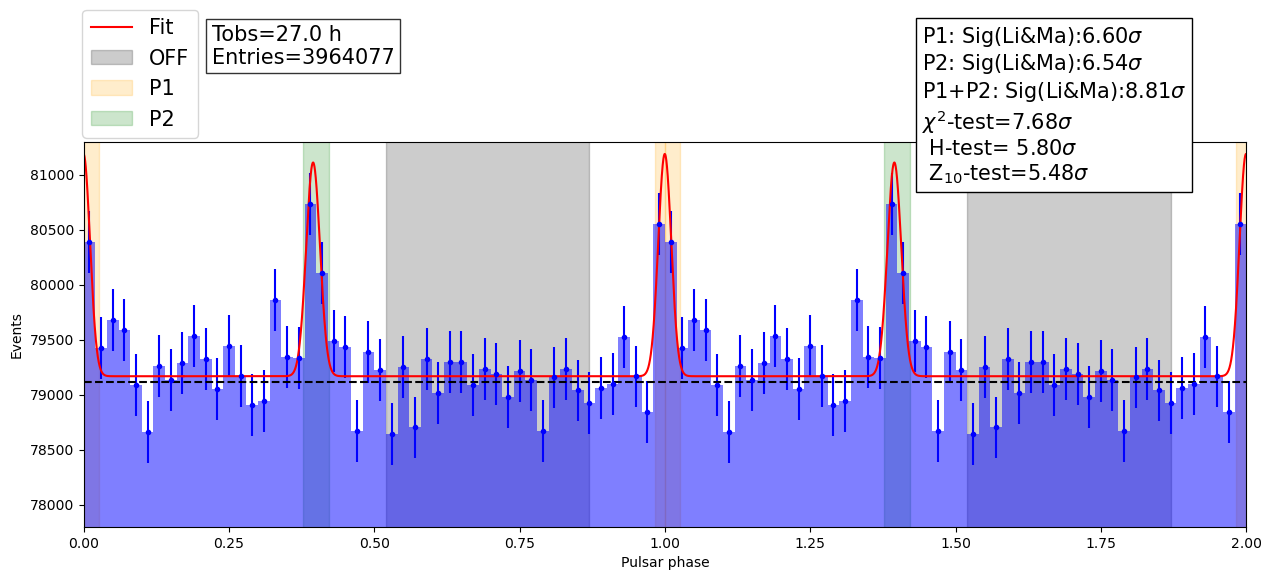

In [13]:
h.draw_phaseogram(phase_limits=[0,2],colorhist='blue',fit=True)

## Results vs Time

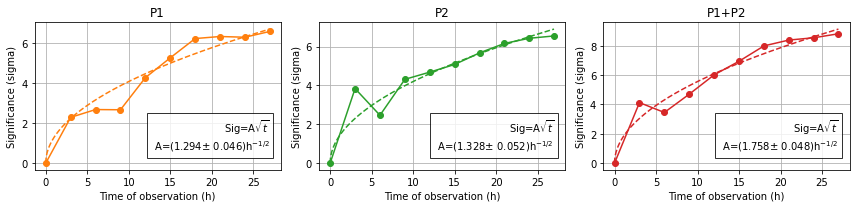

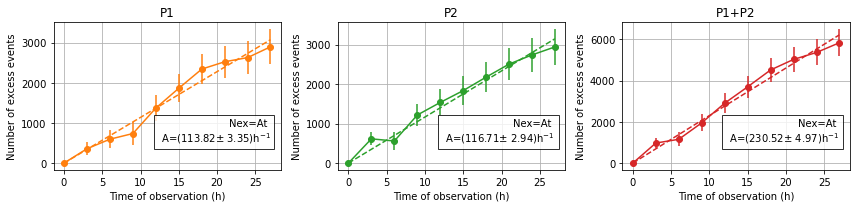

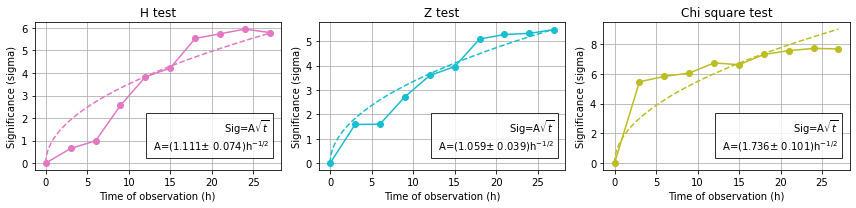

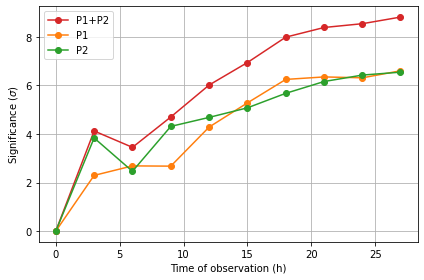

In [9]:
f1,f2=h.show_timeEvolution()

## Results vs Energy

No good fit available


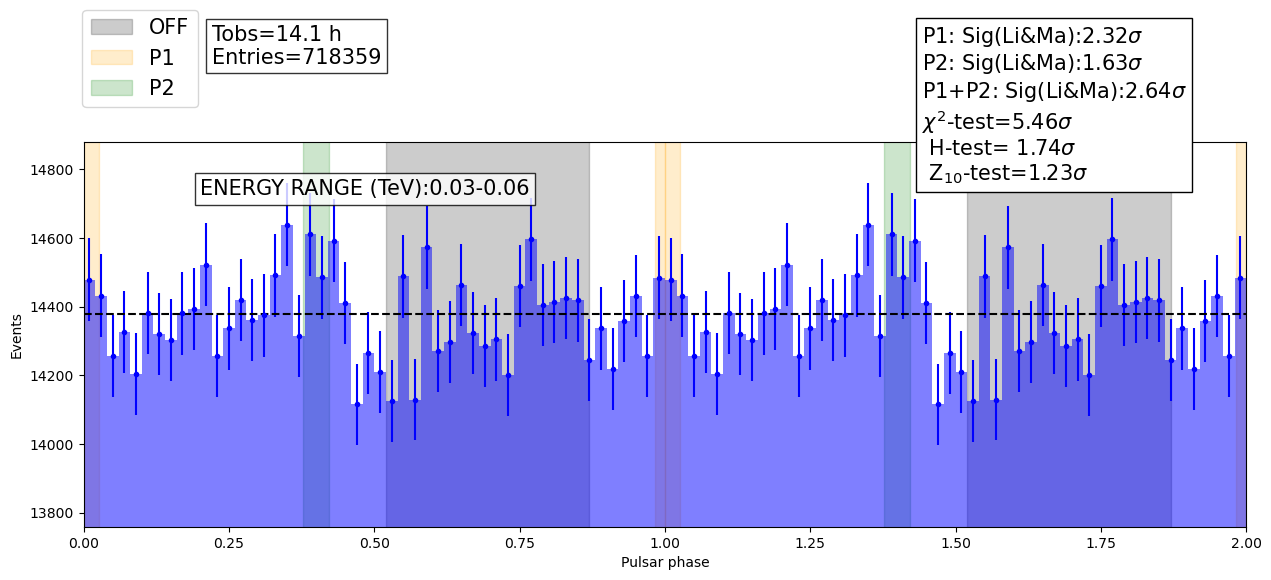

No good fit available


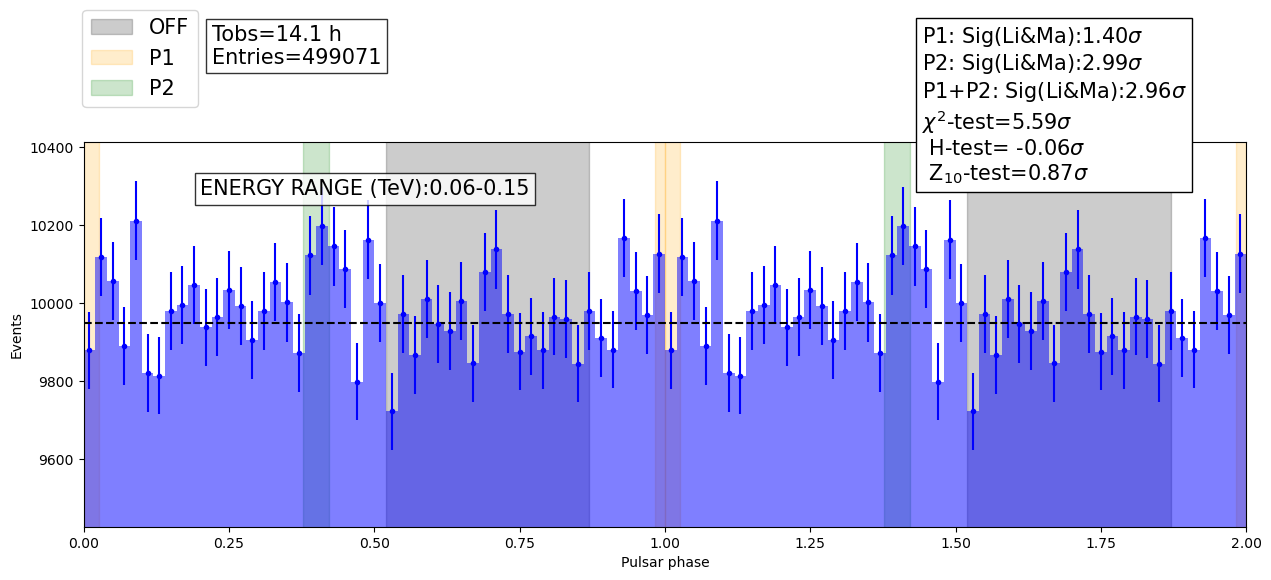

In [14]:
z=h.show_lcVsEnergy()

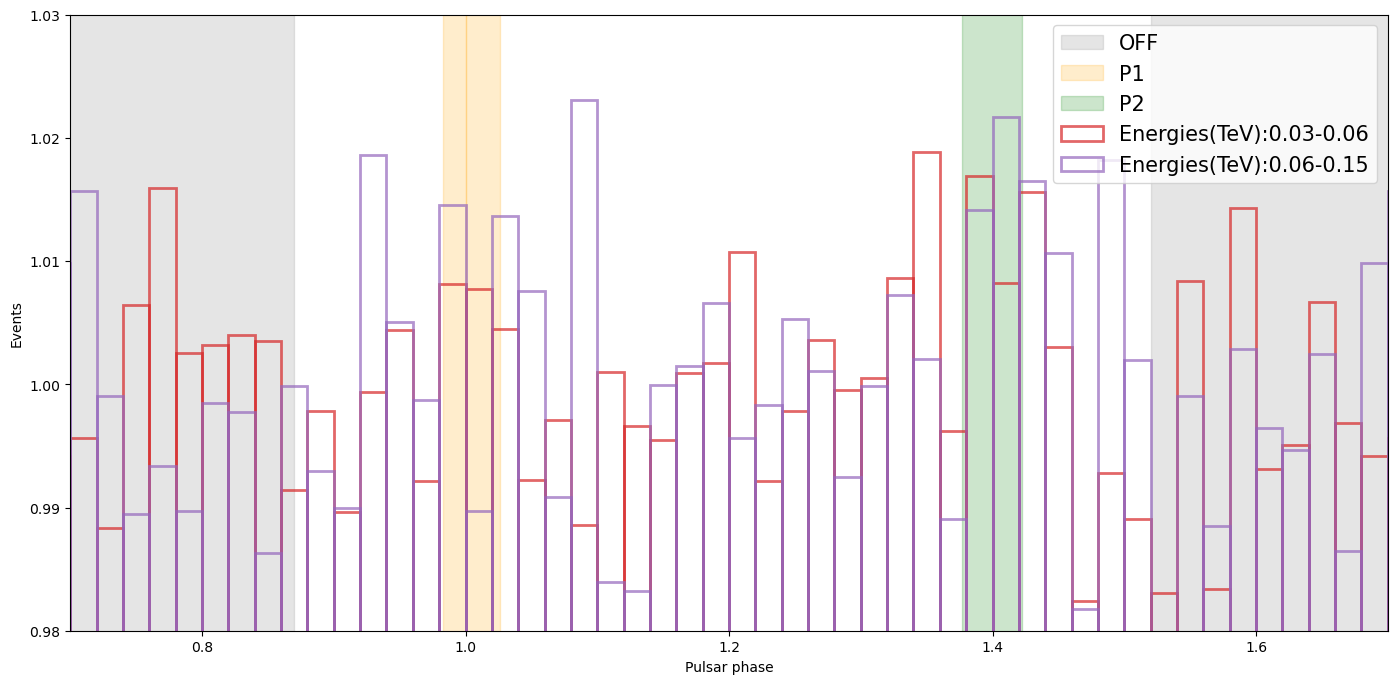

In [17]:
h.show_all_lc(ylimits=[0.98,1.03])

In [15]:
h.EnergyAna.energy_edges

array([0.025     , 0.03981072, 0.06309573, 0.1       , 0.19952623,
       0.31622777])

In [12]:
sp,ss=h.show_EnergyPresults()

ENERGY RANGE (TeV):0.03-0.04

RESULTS FOR THE PEAK STATISTICS:

                        P1            P2          P1+P2
Significance      4.339010      3.094244       4.973559
Nex            1085.408571    792.985714    1878.394286
Nex_error       251.418998    257.176097     378.917418
Number        56414.000000  58695.000000  115109.000000
noff          55328.591429  57902.014286  113230.605714
sign_t_ratio      0.776677      0.553866       0.890261
s/n ratio         4.614434      3.295479       5.582193

P1/P2 ratio=1.37+/-0.55


 
RESULTS FOR THE PERIODICITY SEARCH:

                    Chi_square_test    Zn_test     H_test
Statistic                 58.301981  29.526582  10.181058
p-value                    0.170444   0.077897   0.017387
Number of $\sigma$         5.519024   1.419364   2.110992

 

-------------------------------------------------------------------
ENERGY RANGE (TeV):0.04-0.06

RESULTS FOR THE PEAK STATISTICS:

                        P1            P2         P1+P2

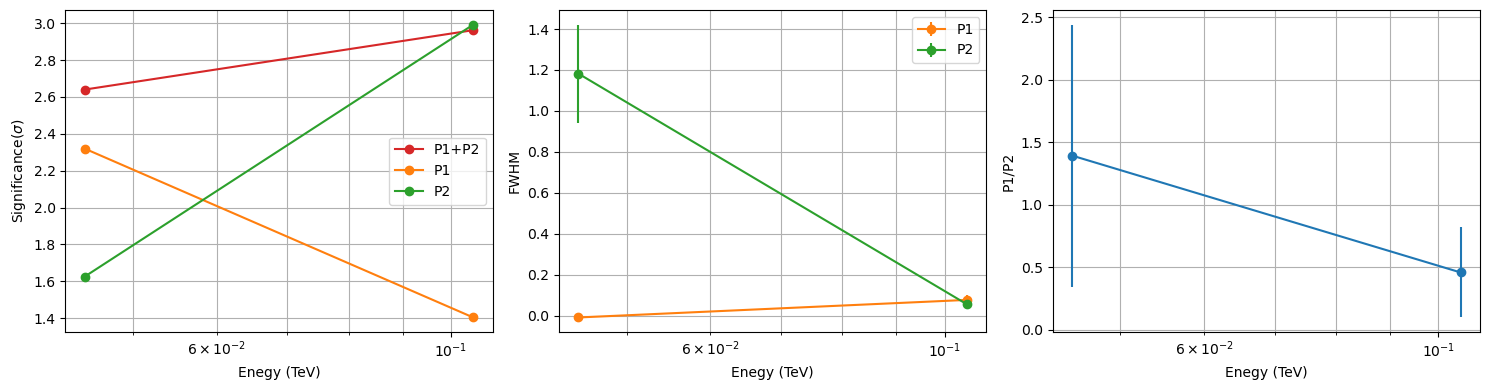

In [11]:
h.show_EnergyAna()

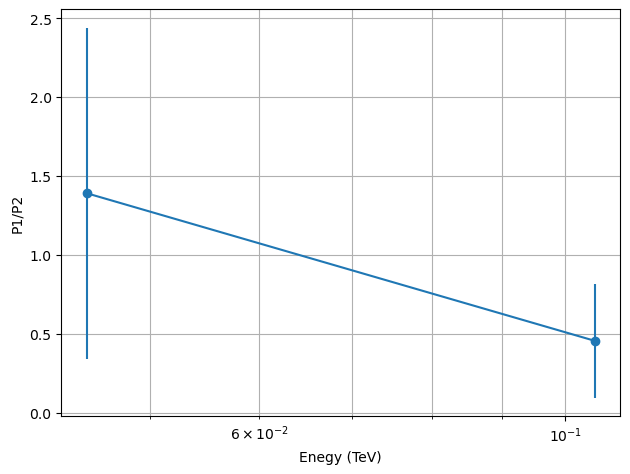

In [12]:
fig=h.show_P1P2VsEnergy()

## Fit vs Energy

In [13]:
r1,r2=h.show_EnergyFitresults()

ENERGY RANGE (TeV):0.03-0.06

      Name     Value         Error
0       mu  0.547957  2.317665e-04
1    sigma -0.003915  2.920809e-05
2     mu_2 -0.958774  8.336189e-02
3  sigma_2  0.501836  1.017687e-01
4        A  2.672262  2.543004e-10
5        B -2.288232  1.257868e-10
6        C -0.384031  3.941451e-11

 

-------------------------------------------------------------------
ENERGY RANGE (TeV):0.06-0.15

      Name     Value      Error
0       mu  0.961992   0.025427
1    sigma  0.032508   0.010724
2     mu_2  0.417309   0.009602
3  sigma_2  0.023424   0.007734
4        A  1.304661  14.877987
5        B  0.001133   0.012928
6        C  0.001847   0.021106

 

-------------------------------------------------------------------


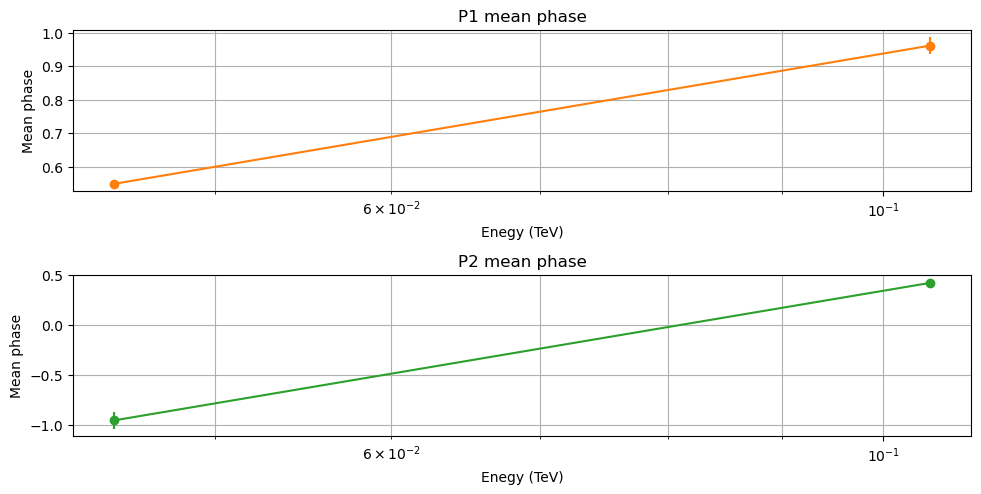

In [14]:
h.show_meanVsEnergy()

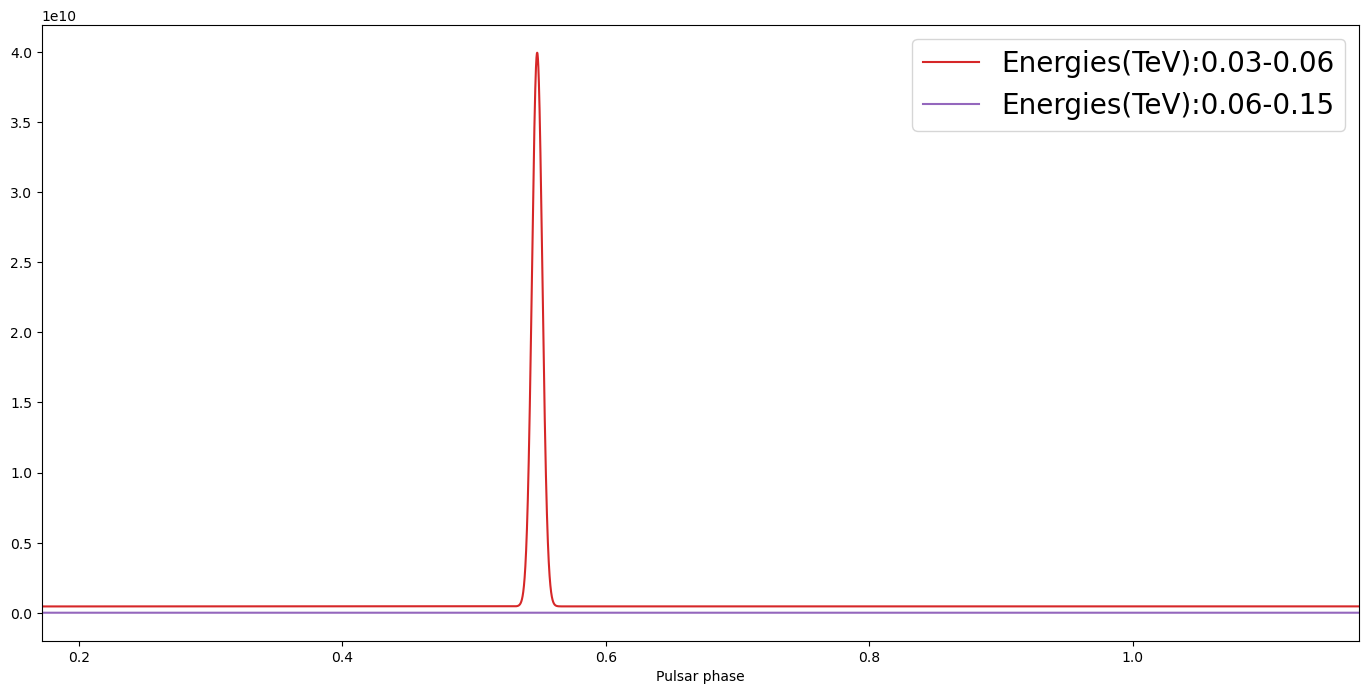

In [15]:
h.show_all_fits()